In [39]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [42]:
class LoopTrajectory:
    def __init__(self, viapoints, t_tot):
        """
        Initialize with an array of viapoints. Viapoints should be a Nx2 array.
        """
        self.viapoints = np.array(viapoints)
        # if the last and first viapoints does not match, append 
        if not np.allclose(self.viapoints[0], self.viapoints[-1]):
            self.viapoints = np.vstack([self.viapoints, self.viapoints[0]])
        self.t_tot = t_tot
        self.compute_spline(t_tot)
    
    def compute_spline(self, t_tot):
        """
        Compute cubic spline for the given viapoints.
        """
        t = np.linspace(0, t_tot, len(self.viapoints))
        self.spline_x = CubicSpline(t, self.viapoints[:, 0], bc_type='periodic')
        self.spline_y = CubicSpline(t, self.viapoints[:, 1], bc_type='periodic')
    
    def compute_trajectory(self, t):
        """
        Compute x, y, omega, x_dot, y_dot, omega_dot as a function of t.
        """
        x = self.spline_x(t)
        y = self.spline_y(t)
        x_dot = self.spline_x(t, 1)
        y_dot = self.spline_y(t, 1)
        omega = np.arctan2(y_dot, x_dot)
        v = np.linalg.norm(np.array([x_dot,y_dot]))
        x_ddot = self.spline_x(t, 2)
        y_ddot = self.spline_y(t, 2)
        v_dot = np.linalg.norm(np.array([x_ddot,y_ddot]))
        omega_dot = (x_dot * y_ddot - y_dot * x_ddot) / (x_dot**2 + y_dot**2)
        
        return x, y, omega, v, x_dot, y_dot, omega_dot, v_dot
    
    def plot_trajectory(self):
        """
        Plot the trajectory for visualization.
        """
        t = np.linspace(0, self.t_tot, 100)
        x, y, _ , _ , _, _, _, _ = self.compute_trajectory(t)
        
        plt.figure()
        plt.plot(x, y, label='Trajectory')
        plt.plot(self.viapoints[:, 0], self.viapoints[:, 1], 'ro', label='Points')
        plt.legend()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Closed Loop Trajectory')
        plt.grid()
        plt.show()

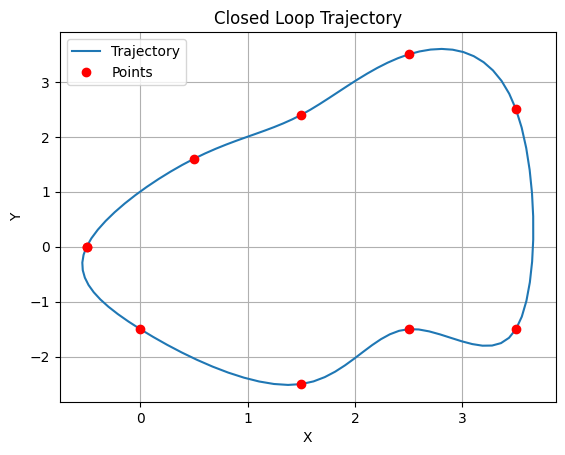

In [43]:
# Example usage:
viapoints = np.array([[-0.5, 0], [0, -1.5], [1.5, -2.5], [2.5, -1.5], [3.5, -1.5], [3.5, 2.5], [2.5, 3.5], [1.5, 2.4], [0.5, 1.6]])
t_tot = 10
trajectory = LoopTrajectory(viapoints, t_tot)
trajectory.plot_trajectory()

In [44]:

# Compute trajectory values at specific time
t_values = np.linspace(0, t_tot, 10)
for t in t_values:
    x, y, omega, v ,x_dot, y_dot, omega_dot, v_dot = trajectory.compute_trajectory(t)
    print(f"t={t:.2f}: x={x:.2f}, y={y:.2f}, omega={omega:.2f}, v={v:.2f}, x_dot={x_dot:.2f}, y_dot={y_dot:.2f}, omega_dot={omega_dot:.2f}, v_dot={v_dot:.2f}")


t=0.00: x=-0.50, y=0.00, omega=-1.81, v=1.53, x_dot=-0.36, y_dot=-1.49, omega_dot=0.97, v_dot=1.76
t=1.11: x=0.00, y=-1.50, omega=-0.88, v=1.81, x_dot=1.15, y_dot=-1.40, omega_dot=0.30, v_dot=1.13
t=2.22: x=1.50, y=-2.50, omega=0.27, v=1.22, x_dot=1.17, y_dot=0.32, omega_dot=2.99, v_dot=3.64
t=3.33: x=2.50, y=-1.50, omega=0.13, v=0.92, x_dot=0.91, y_dot=0.12, omega_dot=-4.25, v_dot=3.89
t=4.44: x=3.50, y=-1.50, omega=1.27, v=2.00, x_dot=0.59, y_dot=1.91, omega_dot=1.57, v_dot=7.16
t=5.56: x=3.50, y=2.50, omega=1.76, v=3.10, x_dot=-0.57, y_dot=3.05, omega_dot=0.62, v_dot=5.12
t=6.67: x=2.50, y=3.50, omega=-2.59, v=1.17, x_dot=-1.00, y_dot=-0.61, omega_dot=1.25, v_dot=1.59
t=7.78: x=1.50, y=2.40, omega=-2.34, v=1.21, x_dot=-0.84, y_dot=-0.87, omega_dot=-0.61, v_dot=1.11
t=8.89: x=0.50, y=1.60, omega=-2.37, v=1.47, x_dot=-1.05, y_dot=-1.03, omega_dot=0.47, v_dot=1.46
t=10.00: x=-0.50, y=0.00, omega=-1.81, v=1.53, x_dot=-0.36, y_dot=-1.49, omega_dot=0.97, v_dot=1.76
